# Schrödinger-Equation (in wave and phase form)

In [1]:

import numpy as np
import matplotlib.pyplot as plt 

from IPython.display import display, Markdown, Latex

import src.wave_schemes as wave_schemes
import src.phase_schemes as phase_schemes
import src.fluid_schemes as fluid_schemes

import src.tests as tests
import src.config as config
import src.analysis as analysis
import src.animation as animation 


test = tests.standingWave

def getBaseConfig():
    c = config.generateConfig(dt=1e-4, t0=0)
    c["dt"]                  = 1e-4
    c["domainSize"]          = 1
    c["xlim"]                = [0, 1]
    c["densityYlim"]         = [0, 2]
    c["resolution"]          = 128
    c["timeOrder"]           = 1
    c["dimension"]           = 1
    c["debug"]               = False
    c["slowDown"]            = 1
    c["tEnd"]                = 1
    c["outputTimestep"]      = False
    c["useAdaptiveTimestep"] = True
    c["usePeriodicBC"]       = False
    c["gravity"]             = 0
    c["nThreads"]            = 4
    c["fps"] = 20
    return c


def ftcsConfig(c):
    c["stencilOrder"] = 6
    c["timeOrder"]    = 2

def cnConfig(c):
    c["stencilOrder"] = 1
    c["timeOrder"]    = 1

def spectralConfig(c):
    c["usePeriodicBC"] = True


def upwindConfig(c):
    c["stencilOrder"] = 1
    c["timeOrder"]    = 4

def upwindWithoutQPConfig(c):
    c["stencilOrder"] = 1
    c["timeOrder"]    = 4
    c["turnOffDiffusion"] = True

def upwindWithoutConvectionConfig(c):
    c["stencilOrder"] = 1
    c["timeOrder"]    = 4
    c["turnOffConvection"] = True 

def hoUpwindConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2

def hoUpwindWithoutDiffusionConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2
    c["turnOffDiffusion"] = True

def hoUpwindWithoutConvectionConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2
    c["turnOffConvection"] = True 

def lwUpwindConfig(c):
    c["stencilOrder"] = 2
    c["timeOrder"] = 1

def ftcsConvectiveConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2

def ftcsConvectiveWithoutSourceConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2
    c["turnOffSource"] = True

def ftcsConvectiveWithoutConvectionConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2
    c["turnOffConvection"] = True 

def ftcsConvectiveWithoutDiffusionConfig(c):
    c["stencilOrder"] = 4
    c["timeOrder"] = 2
    c["turnOffDiffusion"] = True

def musclHancockConfig(c):
    c["stencilOrder"] = 2
    c["timeOrder"] = 2

def standingWaveConfig(c):
    c["tEnd"] = 6
    c["slowDown"] = 1
    c["resolution"] = 64

def oscillatorEigenstateConfig(c):
    c["domainSize"] = 6
    c["xlim"] = [0, 6]
    c["densityYlim"] = [0, 10]

def oscillatorCoherentStateConfig(c):
    c["domainSize"] = 14
    c["xlim"] = [0, 14]
    c["densityYlim"] = [0, 10]
    c["tEnd"] = 4 * np.pi
    c["useAdaptiveYlim"] = True

def fastOscillatorCoherentStateConfig(c):
    c["domainSize"] = 4
    c["xlim"] = [0, 4]
    c["densityYlim"] = [0, 10]
    c["tEnd"] = np.pi

def infiniteWellConfig(c):
    c["domainSize"] = 1
    c["xlim"] = [0, 1]
    c["densityYlim"] = [0, 4]
    c["usePeriodicBC"] = False

def perturbationWaveConfig(c):
    c["usePeriodicBC"] = True
    c["resolution"] = 64
    c["tEnd"] = 1/(2*np.pi*3*0.5)
    c["domainSize"] = 1
    c["xlim"] = [0, 1]
    c["densityYlim"] = [0.98, 1.02]
    c["phaseYlim"] = [-0.01, 0.01]
    c["slowDown"] = 5/c["tEnd"] 


def solitonConfig(c):
    c["usePeriodicBC"] = True
    c["resolution"] = 512
    c["tEnd"] = 10
    c["domainSize"] = 10
    c["xlim"] = [0, 10]
    c["densityYlim"] = [0, 10]
    c["slowDown"] = 10
    c["gravity"] = 1

def expandingSolitonConfig(c):
    c["usePeriodicBC"] = True
    c["resolution"] = 512
    c["tEnd"] = 10
    c["domainSize"] = 10
    c["xlim"] = [0, 10]
    c["densityYlim"] = [0, 10]
    c["slowDown"] = 10
    c["gravity"] = 1
    c["useCosmology"] = True

def li1Config(c):
    c["resolution"] = 128
    c["tEnd"] = .25
    c["domainSize"] = 4
    c["xlim"] = [0, 4]
    c["densityYlim"] = [0, 25]
    c["slowDown"] = 20

def li2Config(c):
    c["usePeriodicBC"] = True
    c["resolution"] = 4096
    c["t0"] = 0.0025
    c["tEnd"] = 0.01
    c["domainSize"] = 10
    c["xlim"] = [-0.3, 2.3]
    c["densityYlim"] = [4.5, 6.5]
    c["phaseYlim"] = [-0.05, 0.05]
    c["slowDown"] = 500

def li3Config(c):
    c["usePeriodicBC"] = True
    c["resolution"] = 512
    c["tEnd"] = .005
    c["domainSize"] = 1
    c["xlim"] = [0, 1]
    c["densityYlim"] = [0, 16]
    c["slowDown"] = 2000


def travellingWavePacketConfig(c):
    c["usePeriodicBC"] = False
    c["resolution"] = 512
    c["tEnd"] = .005
    c["domainSize"] = 1
    c["xlim"] = [0, 1]
    c["densityYlim"] = [0, 16]
    c["slowDown"] = 2000


def perturbationWave2DConfig(c):
    c["dimension"] = 2
    c["usePeriodicBC"] = True
    c["resolution"] = 16
    c["tEnd"] = 1/(2*np.pi*3*0.5)
    c["domainSize"] = 1
    c["xlim"] = [0, 1]
    c["densityYlim"] = [0.6, 1.4]
    c["cfl"] = .2
    c["slowDown"] = 2/c["tEnd"] 

test_list = {
    #"standing wave": [tests.standingWave, standingWaveConfig, None],
    #"harmonic oscillator eigenstate": [tests.oscillatorEigenstate1D, oscillatorEigenstateConfig, lambda x: tests.oscillatorPotential1D(x, x0 = 3)],
    #"harmonic oscillator coherent state": [tests.oscillatorCoherentState1D, oscillatorCoherentStateConfig, lambda x: tests.oscillatorPotential1D(x, x0 = 7)],
    #"infinite well": [tests.infiniteWell1D, infiniteWellConfig, None],
    #"standing wave packet": [lambda x, dx, t: tests.li1(x, dx, t, x0=2), li1Config, None],
    #"quasi-shock": [lambda x, dx, t: tests.li2(x, dx, t, x0 =5), li2Config, None],
    #"wave packet collision": [tests.li3, li3Config, None],
    #"travelling wave packet": [tests.travellingWavePacket, travellingWavePacketConfig, None],
    "perturbation wave": [tests.cosmological1D, perturbationWaveConfig, None],
    #"soliton": [lambda xx, dx, t: tests.cosmological1D(xx, dx, t, eps=5e-3, Lx=10, N=10), solitonConfig, None],
    "expanding_soliton": [lambda xx, dx, t: tests.cosmological1D(xx, dx, t, eps=5e-3, Lx=10, N=10), expandingSolitonConfig, None],
    #"perturbation wave 2D": [lambda x, y, dx, t: tests.cosmological2D(x, y, dx, t, Lx = 1, Ly = 1, N = 3, eps= 0.1), perturbationWave2DConfig, None]
}

scheme_list = {
    #"ftcs (forward in time, centered in space)": [wave_schemes.FTCSScheme, ftcsConfig],
    #"crank-nicolson": [wave_schemes.CNScheme, cnConfig],
    "spectral (fft)": [wave_schemes.SpectralScheme, spectralConfig],
    #"upwind": [phase_schemes.UpwindScheme, upwindConfig],
    #"upwind without quantum pressure": [phase_schemes.UpwindScheme, upwindWithoutDiffusionConfig],
    #"upwind without convection": [phase_schemes.UpwindScheme, upwindWithoutConvectionConfig],
    "ho-upwind": [phase_schemes.HOUpwindScheme, hoUpwindConfig],
    "ho-upwind without diffusion": [phase_schemes.HOUpwindScheme, hoUpwindWithoutDiffusionConfig],
    "ho-upwind without convection": [phase_schemes.HOUpwindScheme, hoUpwindWithoutConvectionConfig],
    #"lw-upwind": [phase_schemes.LaxWendroffUpwindScheme, lwUpwindConfig],
    #"ftcs-convective": [phase_schemes.FTCSConvectiveScheme, ftcsConvectiveConfig],
    #"ftcs-convective without diffusion": [phase_schemes.FTCSConvectiveScheme, ftcsConvectiveWithoutDiffusionConfig],
    #"ftcs-convective without convection": [phase_schemes.FTCSConvectiveScheme, ftcsConvectiveWithoutDiffusionConfig],
    #"ftcs-convective without source": [phase_schemes.FTCSConvectiveScheme, ftcsConvectiveWithoutSourceConfig],
    #"muscl-hancock": [fluid_schemes.MUSCLHancock, musclHancockConfig],
    #"fluid": [fluid_schemes.FluidScheme, musclHancockConfig]
}


def run(title, scheme, c, test, label, potential = None, createAnimation = False):
    filename = title.lower().replace(" ", "_") + "_" + label.lower().replace(" ", "_")
    solver = scheme(c, test)
    solver.setExternalPotentialFunction(potential)

    if not createAnimation:
        i = 0
        while (solver.t < solver.config["tEnd"]):
            solver.step(solver.getTimeStep())
            i += 1

        print(f"Finished in {i} steps.")
        animation.drawFrame(solver = solver, label = title, analyticalSolution = test, filename = filename)
        plt.show()
    else:
        animation.createAnimation(solver = solver, label = title, analyticalSolution = test, filename = filename)

def runTest(title, createAnimation = False):
    test, testConfig, potential = test_list[title]

    display(Markdown('# ' + title))

    for key, value in scheme_list.items():
        scheme, schemeConfig = value

        c = getBaseConfig()
        testConfig(c)
        schemeConfig(c)

        display(Markdown('## ' + key))

        run(title, scheme, c, test, key, potential, createAnimation)

In [14]:
for key, value in test_list.items():
#runTest("Infinite well", True)
    runTest(key, createAnimation = True)

# expanding_soliton

## spectral (fft)

Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
Number of frames: 2000, time per frame (ms) = 5.0 and frames per second 20
Create animation with configuration:  {'dimension': 1, 'resolution': 512, 'domainSize': 10, 'usePeriodicBC': True, 'ghostBoundarySize': 3, 't0': 0, 'tEnd': 10, 'dt': 0.0001, 'slowDown': 10, 'fps': 20, 'useAdaptiveTimestep': True, 'cfl': 1, 'maximumNumberOfTimesteps': 100000, 'timeOrder': 1, 'stencilOrder': 1, 'fluxLimiter': 'VANALBADA', 'gravity': 1, 'useCosmology': True, 'nThreads': 4, 'externalPotential': None, 'debug': False, 'outputTimestep': False, 'useHybrid': False, 'useAdaptiveSubregions': False, 'subregions': [], 'windowUpdateFrequency': 100, 'WindowSize': 0.5, 'mode': 0, 'enoOrder': 1, 'rhoOrder': 1, 'modifiedPQN': 3, 'xlim': [0, 10], 'densityYlim': [0, 10], 'phaseYlim': [-3.14, 3.14], 'useAdaptiveYlim': False, 'plotDensityLogarithm': True, 'plotPhaseMod2': True, 'dpi': 80, 'artificialDiffusion': 1, 'fluxMode': 0,

Constructing scheme
Setting up grid
Reading in initial conditions
Setting up fourier grid
Finished in 245761 steps.


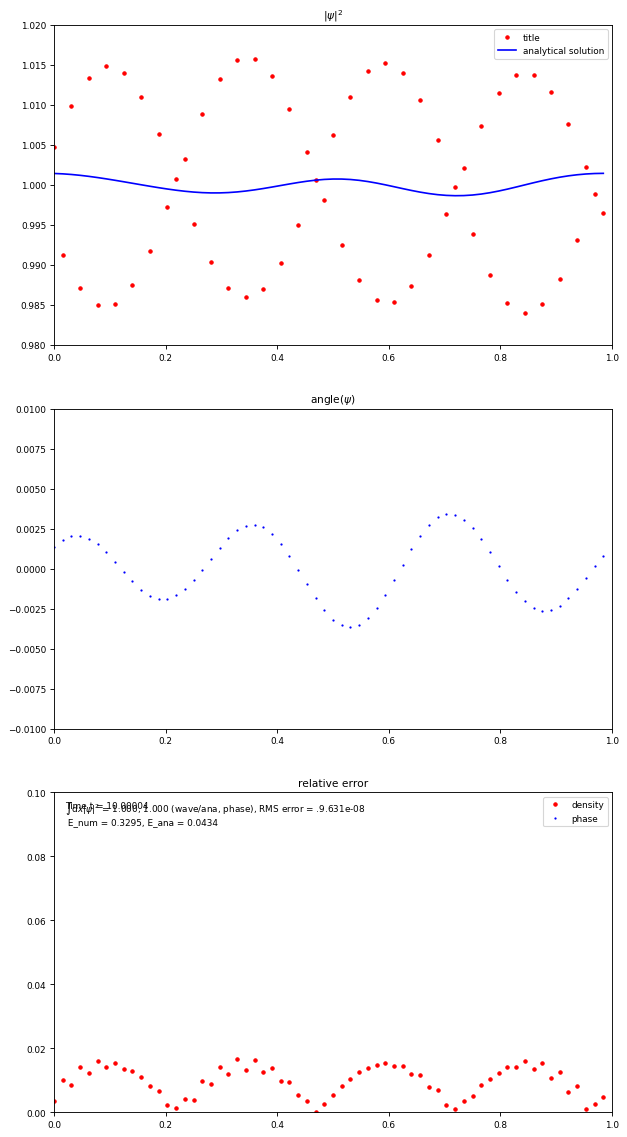

In [2]:

test, testConfig, potential = test_list["perturbation wave"]

scheme, schemeConfig = scheme_list["ho-upwind"]

c = getBaseConfig()
testConfig(c)
schemeConfig(c)
c["gravity"] = 1
c["tEnd"] = 10

run("title", scheme, c, test, "name", potential, False)

In [2]:
solver = scheme(c, test)

NameError: name 'scheme' is not defined